<b><font size="8">Project-"Where Should I live." </font></b>
<br><br>
Nos últimos anos, a mobilidade dentro da Europa tem aumentado, impulsionada por fatores como o trabalho remoto, a educação internacional e mudanças nas prioridades pessoais e profissionais. Como consequência, muitas pessoas procuram informação fiável que as ajude a decidir onde viver, tendo em conta aspetos como o custo de vida, as oportunidades de emprego, a segurança e a qualidade de vida em geral.
Em resposta a esta necessidade, a Comissão Europeia, através da Direção-Geral do Emprego, dos Assuntos Sociais e da Inclusão, lançou uma iniciativa com o objetivo de melhorar o acesso a informação comparativa sobre as condições de vida nos diferentes países europeus. No âmbito desta iniciativa, foi criada uma equipa de ciência de dados com a missão de transformar dados complexos ao nível dos países em informação clara e útil para os cidadãos.
O projeto “Where Should I Live?” pretende contribuir para este objetivo através da análise de características fundamentais dos países europeus, como o custo de vida, a segurança e o emprego. Recorrendo à análise exploratória de dados e à criação de visualizações, o projeto procura ajudar os utilizadores a comparar países e a identificar aqueles que melhor correspondem aos seus objetivos e preferências pessoais, tornando a decisão sobre onde viver mais informada e acessível.<br>

#### Group: Matilde Rodrigues(20241873); Teresa Vasconcelos(20241864); Rita Oliveira(20241871)

<b><font size="4"> Importar as bibliotecas necessárias </font></b>

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt 
import time

from bs4 import BeautifulSoup      
from selenium import webdriver      
from selenium.webdriver.common.by import By
import requests    
import re

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


<b><font size="5">Data Wrangling and Analysis </font></b>
<br><br>
A primeira etapa do projeto consiste em importar, compreender e preparar o conjunto de dados para análise. Este processo permite identificar as principais características das cidades em estudo e criar visualizações claras e informativas. A partir destes dados, torna-se possível responder às questões propostas.<b>

<b><font size="4"> Importar o DataSet </font></b>

In [354]:
citys = pd.read_csv('city_data.csv',sep='|',header=1, index_col="City")
citys

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00


<b><font size="4"> Observar a estrutura do DataSet </font></b>

In [355]:
citys.head()

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
City,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


<b><font size="4"> 
Glossário das variáveis do DataSet

City- Nome da cidade e o respetivo país

Population Density- Densidade populacional (habitantes por km2)

Population- População total da cidade

Working Age Population- Grupo da população em idade ativa (15-64)

Youth Dependency Ratio- Relação entre a população jovem e a população em idade ativa, definida habitualmente como o quociente entre o número de pessoas com idades compreendidas entre os 0 e os 15 anos e o número de pessoas com idades compreendidas entre os 15 e os 64 anos 

Unemployement Rate- Taxa de desemprego (população desempregada em idade ativa)

GDP per capita- PIB per capita em dólares americanos (valor total da riqueza produzida num país (o PIB) dividido pelo número de habitantes, servindo como um indicador médio da riqueza ou rendimento por pessoa) 

Days of very strong heat stress- Dias de calor intenso, normalmente entre  38°C e 46°C

Main Spoken Languages- Línguas mais faladas na cidade

Average Monthly Salary- Salário médio mensal estimado em euros

Average Rent Price- Preço médio estimado das rendas para um apartamento de um quarto no centro da cidade

Average Cost of Living- Custo de vida médio estimado para uma pessoa a viver na cidade (inclui renda)

Last Data Update- Dia que os dados da cidade sofreram as últimas alterações</font></b>

<b><font size="5"> 1. </font></b>

<b><font size="4"> Verificar se há missing values nos dados </font></b>

In [356]:
citys.isna().sum()

Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Avgerage Rent Price                 0
Average Cost of Living              0
Average Price Groceries            80
Last Data Update                    0
dtype: int64

<font size="3">Através do código, verificamos a existência de missing values e procedemos à limpeza e tratamento dos dados</font>

<b><font size="4"> Verificar o nome das colunas do DataSet </font></b>

In [357]:
citys.columns

Index(['Population Density', 'Population', 'Working Age Population ',
       'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Average Price Groceries',
       'Last Data Update'],
      dtype='object')

<b><font size="4"> Limpeza e tratamento dos dados </font></b>

In [358]:
citys1 = citys.drop(columns=['Average Price Groceries'],axis=1)
citys1

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15 00:00:00
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03 00:00:00
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22 00:00:00
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09 00:00:00
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11 00:00:00
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10 00:00:00
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07 00:00:00


<font size="3">Removemos a coluna "Average Price Groceries" por ter uma grande quantidade de missing values (80) sendo que existem 86 linhas. </font>

<b><font size="4"> Preenchimento dos Missing values com novos valores </font></b>

<font size="3"> Preenchemos, na coluna 'Population Density', os valores de densidade populacional de Valência, que apresentava missing values. </font>

<font size="3"> Fonte: https://pt.wikipedia.org/wiki/Valência </font>

In [359]:
citys1[citys1['Population Density'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
"Valencia, Spain",NaN,1748142,1162828.0,22.6,13.7,33570.0,5,Spanish;Valencian,2400,1190,1300,2023-06-04 00:00:00


In [360]:
citys1['Population Density'] = citys1['Population Density'].fillna(5865.2)
citys1[citys1['Population Density'].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,


<font size="3"> Na coluna working age population, a cidade de Dusseldorf apresenta missing value, que substituimos por um valor retirado da Web </font>

<font size="3"> Fonte: https://www.arbeitsagentur.de/vor-ort/duesseldorf/statistik? </font>

In [361]:
citys1[citys1["Working Age Population "].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
"Dusseldorf, Germany",1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15 00:00:00


In [362]:
citys1['Working Age Population '] = citys1['Working Age Population '].fillna(424159.0)
citys1[citys1['Working Age Population '].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,


<font size="3"> Na coluna "Unemployment Rate", a cidade de Gent apresenta missing values, que foram substituidos. </font>

<font size="3"> Fonte: https://provincies.incijfers.be/databank/report/?id=rapport_economie&input_geo=gemeente_44021%2C&utm  </font>

In [363]:
citys1[citys1["Unemployment Rate"].isnull()] 

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17 00:00:00


In [364]:
citys1["Unemployment Rate"]=citys1["Unemployment Rate"].fillna(10.8)
citys1[citys1["Unemployment Rate"].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,


<font size="3"> Na coluna "GDP per Capita", a cidade de Lemesos (Cyprus) apresenta missing values, que foram substituidos. </font>

<font size="3"> Fonte:  https://metroverse.hks.harvard.edu/city/4065/economic-composition?utm </font>

In [365]:
citys1[citys1["GDP per Capita"].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
Lemesos;Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,2023-08-14 00:00:00


In [366]:
citys1["GDP per Capita"]=citys1["GDP per Capita"].fillna(3598.40)
citys1[citys1["GDP per Capita"].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,


<font size="3"> Na coluna "Main Spoken Languages", a cidade de Dusseldorf apresenta missing values, que foram substituidos. </font>

<font size="3"> Fonte:  https://citiesinsider.com/country/germany/dusseldorf/languages/en?ut </font>

In [367]:
citys1[citys1["Main Spoken Languages"].isnull()] 

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,
"Dusseldorf, Germany",1295.0,1554077,424159.0,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15 00:00:00


In [368]:
citys1["Main Spoken Languages"]=citys1["Main Spoken Languages"].fillna("German,English")
citys1[citys1["Main Spoken Languages"].isnull()]

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,


<font size="3"> Verificar que não há nenhum missing value. </font>

In [369]:
citys1.isna().sum() 

Population Density                 0
Population                         0
Working Age Population             0
Youth Dependency Ratio             0
Unemployment Rate                  0
GDP per Capita                     0
Days of very strong heat stress    0
Main Spoken Languages              0
Average Monthly Salary             0
Avgerage Rent Price                0
Average Cost of Living             0
Last Data Update                   0
dtype: int64

<font size="3"> Ver qual a categoria de cada coluna </font>

In [370]:
citys1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, Vienna, Austria to Adana, Turkiye
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population Density               86 non-null     float64
 1   Population                       86 non-null     int64  
 2   Working Age Population           86 non-null     float64
 3   Youth Dependency Ratio           86 non-null     float64
 4   Unemployment Rate                86 non-null     float64
 5   GDP per Capita                   86 non-null     float64
 6   Days of very strong heat stress  86 non-null     int64  
 7   Main Spoken Languages            86 non-null     object 
 8   Average Monthly Salary           86 non-null     int64  
 9   Avgerage Rent Price              86 non-null     int64  
 10  Average Cost of Living           86 non-null     int64  
 11  Last Data Update                 86 non-null     object 
dtypes: 

<font size="3"> Verificar quais colunas podem ter os seus valores convertidos para int. </font>

In [371]:
citys1.select_dtypes(include=['float16', 'float64']).apply(lambda x: x.astype(int) == x).all()

Population Density         False
Working Age Population      True
Youth Dependency Ratio     False
Unemployment Rate          False
GDP per Capita             False
dtype: bool

<font size="3"> Verificámos que a coluna "Working Age Population" pode ser convertida para int. </font>

In [372]:
citys2= citys1.astype({'Population Density' : 'float16',
                      'Population' : 'int32',
                      'Working Age Population ' : 'int32', 
                      'Youth Dependency Ratio' : 'float16',
                      'Unemployment Rate': 'float16',
                      'GDP per Capita' : 'float32',
                      'Days of very strong heat stress':'int8',
                      'Average Monthly Salary':'int16',
                      'Avgerage Rent Price':'int16',
                      'Average Cost of Living' : 'int16',})

<font size="3"> Reduzir o espaço que os dados ocupam através da adaptação dos valores para os seus respetivos grupos de int e float. </font>

In [373]:
citys2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, Vienna, Austria to Adana, Turkiye
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population Density               86 non-null     float16
 1   Population                       86 non-null     int32  
 2   Working Age Population           86 non-null     int32  
 3   Youth Dependency Ratio           86 non-null     float16
 4   Unemployment Rate                86 non-null     float16
 5   GDP per Capita                   86 non-null     float32
 6   Days of very strong heat stress  86 non-null     int8   
 7   Main Spoken Languages            86 non-null     object 
 8   Average Monthly Salary           86 non-null     int16  
 9   Avgerage Rent Price              86 non-null     int16  
 10  Average Cost of Living           86 non-null     int16  
 11  Last Data Update                 86 non-null     object 
dtypes: 

<font size="3"> Mudar o nome de uma coluna que estava errado ('Average Rent Price'). </font>


In [374]:
citys2=citys2.rename(columns={'Avgerage Rent Price': 'Average Rent Price'})

<font size="3"> Redefinir o índice do DataSet e verificar quantas vezes cada cidade aparece </font>

In [375]:
citys2.reset_index(inplace=True)
citys2['City'].value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

<b><font size="5"> 2. a) </font></b>

<font size="3"> Ver qual o país que mais aparece no DataSet e as suas cidades. </font>

In [376]:
countries = citys2['City'].str.split(",").str[-1].str.strip()
most_common_country = countries.value_counts().idxmax()
print(f"the most common country is {most_common_country}")


the most common country is Germany


<font size="3"> O país que mais aparece é a Alemanha. </font>

<font size="3"> Ver quantas cidades há associadas à Alemanha, presentes no DataSet </font>

In [377]:
num_cidades = citys2[citys2["City"].str.endswith("Germany")].shape[0]

print(f"Número de cidades na Alemanha: {num_cidades}")


Número de cidades na Alemanha: 11


<font size="3"> 11 cidades estão associadas à Alemanha no DataSet </font>

<font size="3"> Ver que cidades estão repetidas </font>

In [378]:
citys.index.value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

<b><font size="5"> 2. b) </font></b>

<font size="3"> Quantas cidades estão presentes no DataSet? </font>

In [379]:
num_cidades = citys2.shape[0]
print(f"Número total de cidades: {num_cidades}")


Número total de cidades: 86


<font size="3"> Quantas cidades estão associadas à Grécia no DataSet </font>

In [380]:
num_cidades_greece = citys2[citys2["City"].str.endswith("Greece")].shape[0]
print(f"Número de cidades na Grécia: {num_cidades_greece}")


Número de cidades na Grécia: 1


<b><font size="5"> 2. c) </font></b>

<font size="3"> Qual a língua menos falada? </font>

In [381]:

count_language = citys2["Main Spoken Languages"] \
    .str.split(",") \
    .explode() \
    .str.strip() \
    .value_counts()

menos_falada = count_language.idxmin()  


print(f"lingua menos falada: {menos_falada}")


lingua menos falada: Bengali


<font size="3"> Quais são as três linguas mais faladas? </font>

In [382]:

tres_mais_faladas=citys2["Main Spoken Languages"] \
    .str.split(",") \
    .explode() \
    .str.strip() \
    .value_counts() \
    .head(3)

print(tres_mais_faladas)

Main Spoken Languages
English    49
German     16
Turkish    11
Name: count, dtype: int64


<b><font size="5"> 3. a) </font></b>

<font size="3"> Dados anteriores a abril de 2023 precisam de ser atualizados. </font>

In [383]:
citys2["Last Data Update"].min()


'2023-01-19 00:00:00'

<font size="3"> As cidades que precisam de atualização são: </font>

In [384]:
dados_antigos = citys2[citys2["Last Data Update"] < "2023-04-01"]

for idx, row in dados_antigos.iterrows():
    print(f" As cidades que precisam de atualização são: {row['City']}")


 As cidades que precisam de atualização são: Basel, Switzerland
 As cidades que precisam de atualização são: Munich, Germany
 As cidades que precisam de atualização são: Frankfurt am Main, Germany
 As cidades que precisam de atualização são: Lyon,  France
 As cidades que precisam de atualização são: Venice, Italy
 As cidades que precisam de atualização são: Gothenburg, Sweden


<b><font size="5"> 3. b) </font></b>

<font size="3"> Há quantos dias foi feita a ultima atualização? (em que dia, mês ocorreu)</font>

In [385]:

citys['Last Data Update'] = pd.to_datetime(citys['Last Data Update'])
last_update = citys['Last Data Update'].max()
print("Última atualização:", last_update)


Última atualização: 2024-12-12 00:00:00


<b><font size="5"> 4. a) </font></b>

<font size="3"> Distribuição de Taxa de Desemprego e PIB per capita e a sua relação.  </font>

<font size="2"> PIB per capita (Produto Interno Bruto por habitante) é uma medida económica que divide o valor total de bens e serviços produzidos num país (PIB) pela sua população, indicando o valor económico médio por pessoa, sendo um indicador chave para comparar o crescimento económico e o nível de vida entre países. É um rácio que reflete a riqueza média gerada por habitante, embora não mostre a desigualdade na distribuição dessa riqueza.   
(fonte: https://www.google.com/url?sa=i&source=web&rct=j&url=https://ourworldindata.org/grapher/gdp-per-capita-worldbank&ved=2ahUKEwiH7IWVhsORAxW2UqQEHa1hDtYQqYcPegQICRAC&opi=89978449&cd&psig=AOvVaw1h-7ZZ04hLEuT0OufhBBcX&ust=1766006808172000)</font>

<font size="2"> A taxa de desemprego é a percentagem de pessoas na população ativa que estão desempregadas (sem trabalho, mas à procura ativamente de emprego) em relação ao total da população ativa, sendo calculada pela fórmula: (População Desempregada / População Ativa) x 100. É um indicador chave da saúde económica de um país, mostrando a proporção de pessoas com capacidade e vontade de trabalhar que não encontram emprego.  
(fonte:https://www.google.com/url?sa=i&source=web&rct=j&url=https://www.c6bank.com.br/blog/taxa-de-desemprego%23:~:text%3DPublicado%2520em,3%2520de%2520junho%2520de%25202022%26text%3DA%2520taxa%2520de%2520desemprego%2520%25C3%25A9,Como%2520abrir%2520MEI?&ved=2ahUKEwiFveu2hsORAxVyZqQEHd-hDH4QqYcPegQICxAC&opi=89978449&cd&psig=AOvVaw3Iuoxc5a7DDKqstXPbjEC3&ust=1766006879043000) </font>

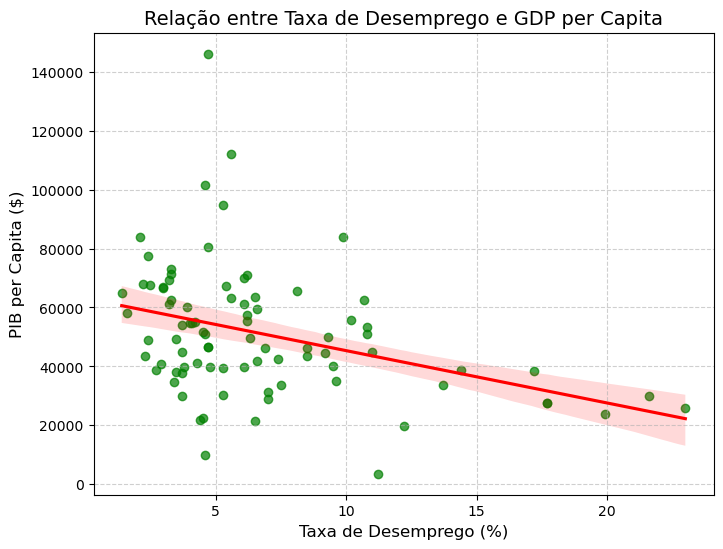

In [386]:

plt.figure(figsize=(8, 6))
sns.regplot(
    x='Unemployment Rate', 
    y='GDP per Capita', 
    data=citys2, 
    scatter_kws={'alpha': 0.7, 'color': 'green'}, 
    line_kws={'color': 'red'}
)
plt.title('Relação entre Taxa de Desemprego e GDP per Capita', fontsize=14)
plt.xlabel('Taxa de Desemprego (%)', fontsize=12)
plt.ylabel('PIB per Capita ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


<font size="3"> Os pontos de dispersão representam cada cidade, com a sua respetiva taxa de desemprego e GDP per capita. A linha de regressão vermelha demonstra que as variaveis tem uma relação negativa.
Esta relação negativa sugere que quando a taxa de desemprego aumenta, o GDP per capita tende a diminuir. </font>

<b><font size="5"> 4. b) </font></b>

<font size="3"> Países com maior diferença entre salário médio e custo de vida por cidade: </font>

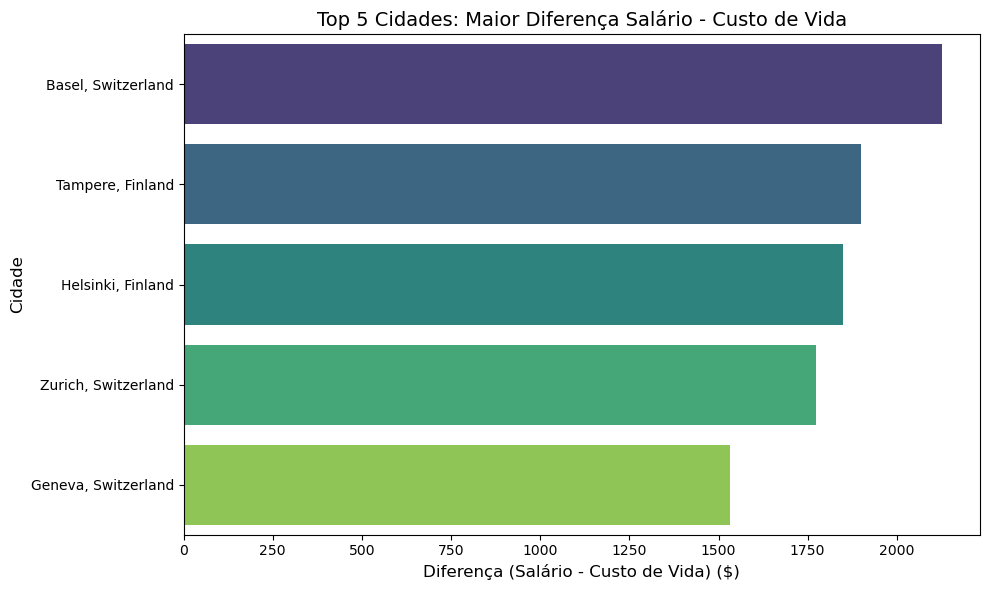

In [387]:
citys2['Salary_Cost_Difference'] = citys2['Average Monthly Salary'] - citys2['Average Cost of Living']
top_5_cities = citys2.sort_values(by='Salary_Cost_Difference', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    y='City', 
    x='Salary_Cost_Difference', 
    data=top_5_cities, 
    palette='viridis' 
)


plt.title('Top 5 Cidades: Maior Diferença Salário - Custo de Vida', fontsize=14)
plt.xlabel('Diferença (Salário - Custo de Vida) ($)', fontsize=12)
plt.ylabel('Cidade', fontsize=12)
plt.tight_layout()
plt.show()



<font size="3"> Criação da coluna de países: </font>

In [388]:
citys2['Country'] = citys2['City'].str.split(",").str[-1].str.strip()


<font size="3"> Países com menor diferença entre salário médio e custo de vida por cidade: </font>

<font size="2"> Reparámos que Atenas foi extraido como país quando devia ser Grécia, corrigimos: </font>

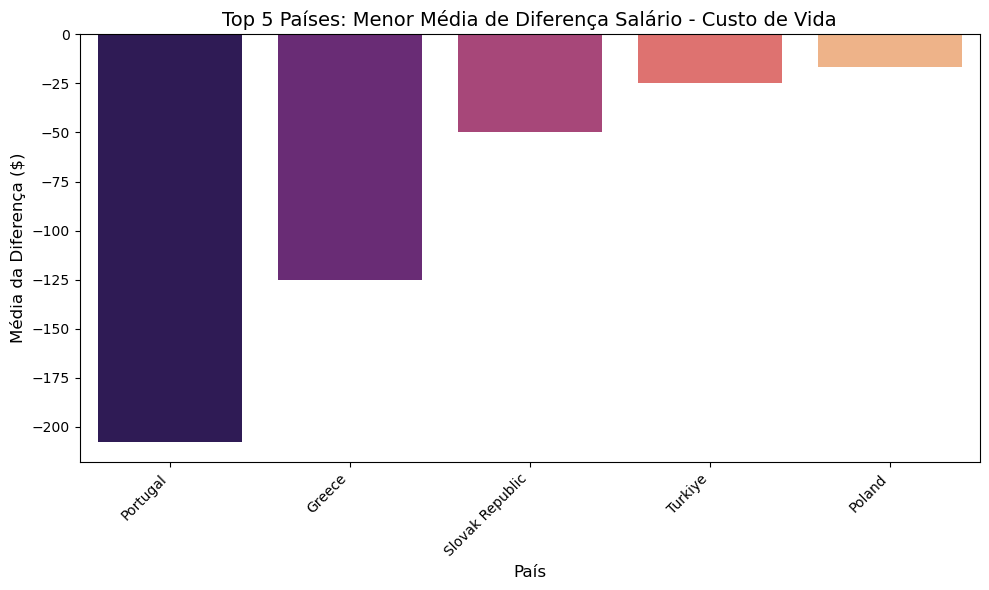

In [389]:
citys2['Country'] = citys2['Country'].replace('Athens', 'Greece')

dif_media = citys2.groupby('Country')['Salary_Cost_Difference'].mean().reset_index()
dif_media.columns = ['Country', 'Avg_Salary_Cost_Difference']

top5_pequenos = dif_media.sort_values(
    by='Avg_Salary_Cost_Difference', 
    ascending=True
).head()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country', 
    y='Avg_Salary_Cost_Difference', 
    data=top5_pequenos, 
    palette='magma' 
)

plt.title('Top 5 Países: Menor Média de Diferença Salário - Custo de Vida', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Média da Diferença ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Roda os rótulos para que não se sobreponham
plt.tight_layout()
plt.show()

<b><font size="5"> 4. c) </font></b>

<font size="3"> Melhor cidade para alguém que procura um salário acima de 2000€, custo de vida igual ou inferior a 1600€ e a menor taxa de desemprego possível: </font>

In [390]:
filtered_cities = citys2[
    (citys2['Average Monthly Salary'] >= 2000) & (citys2['Average Cost of Living'] <= 1600)] 


best_city = filtered_cities.sort_values(by='Unemployment Rate', ascending=True).head(1)

result = best_city[['City', 'Average Monthly Salary', 'Average Cost of Living', 'Unemployment Rate']].iloc[0]

best_city_name = result['City']
salary = f"€{result['Average Monthly Salary']:.0f}"
cost = f"€{result['Average Cost of Living']:.0f}"
unemployment = f"{result['Unemployment Rate']:.1f}%"

print(f"the best city to live based on these criteria is {best_city_name}")
print(f"its average salary is {salary}")
print(f"the average cost of living in this city is {cost}")

the best city to live based on these criteria is Dresden, Germany
its average salary is €3050
the average cost of living in this city is €1530


<b><font size="5"> 5. </font></b>

<font size="3"> Três sugestões de análise:


1.Ver relação entre Unemployement Rate e Youth Dependency Ratio

2.Ver comparação entre Average Rent Price e Average Monthly Salary

3.Ver comparação entre Population e Working Age Population
</font>

<font size="3"> 1. Ver relação entre Unemployement Rate e Youth Dependency Ratio
</font>


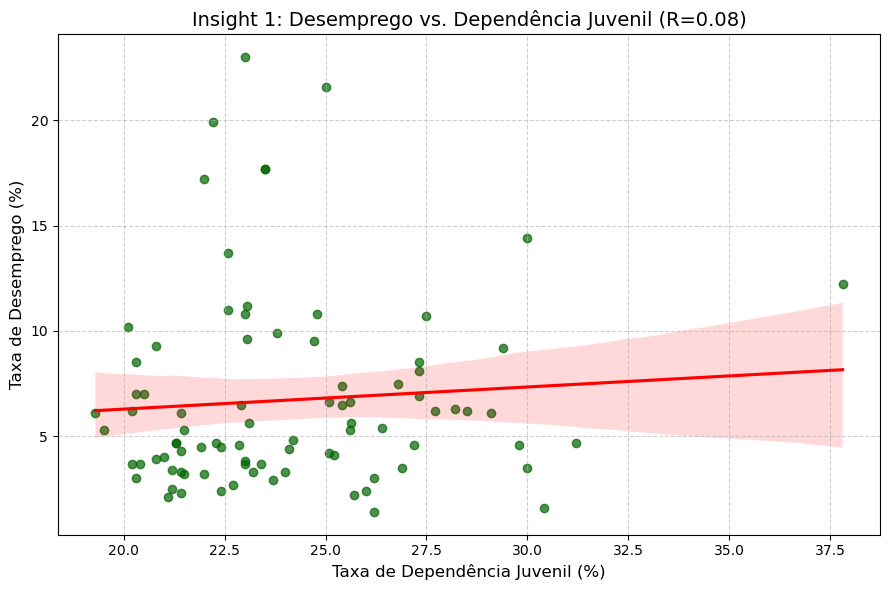

In [391]:
#primeira-ver relação entre taxa de desemprego e youth dependency ratio
correlation_1 = citys2['Unemployment Rate'].corr(citys2['Youth Dependency Ratio'])

plt.figure(figsize=(9, 6))
sns.regplot(
    x='Youth Dependency Ratio', 
    y='Unemployment Rate', 
    data=citys2, 
    scatter_kws={'alpha': 0.7, 'color': 'darkgreen'},
    line_kws={'color': 'red'}
)
plt.title(f'Insight 1: Desemprego vs. Dependência Juvenil (R={correlation_1:.2f})', fontsize=14)
plt.xlabel('Taxa de Dependência Juvenil (%)', fontsize=12)
plt.ylabel('Taxa de Desemprego (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<font size="3"> 2. Ver comparação entre Average Rent Price e Average Monthly Salary
</font>

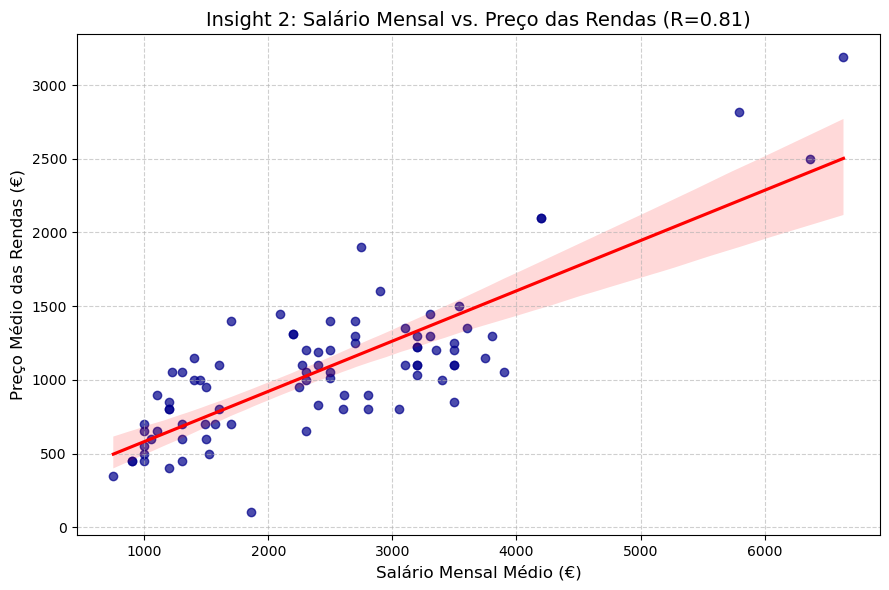

In [392]:
correlation_2 = citys2['Average Monthly Salary'].corr(citys2['Average Rent Price'])

plt.figure(figsize=(9, 6))
sns.regplot(
    x='Average Monthly Salary', 
    y='Average Rent Price', 
    data=citys2, 
    scatter_kws={'alpha': 0.7, 'color': 'darkblue'},
    line_kws={'color': 'red'}
)
plt.title(f'Insight 2: Salário Mensal vs. Preço das Rendas (R={correlation_2:.2f})', fontsize=14)
plt.xlabel('Salário Mensal Médio (€)', fontsize=12)
plt.ylabel('Preço Médio das Rendas (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<font size="3"> 3. Ver Top 5 de países com maior diferença entre Population e Working Age Population e apresentar graficamente
</font>

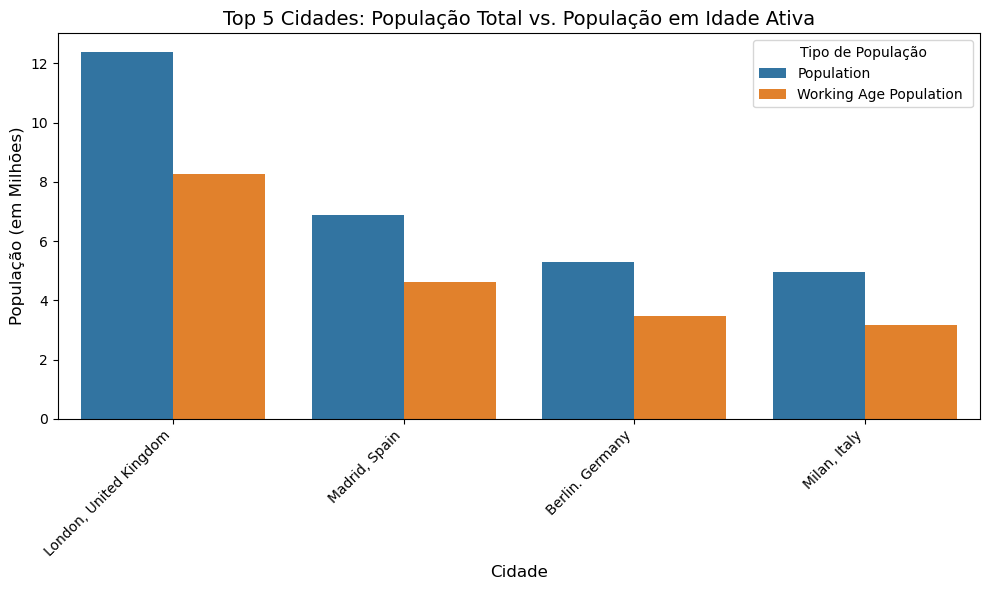

In [393]:
citys2['Population_Difference'] = citys2['Population'] - citys2['Working Age Population ']
top_5_cities = citys2.sort_values(by='Population_Difference', ascending=False).head(5)


melt = top_5_cities[['City', 'Population', 'Working Age Population ']].melt(
    id_vars='City', 
    var_name='Category', 
    value_name='Value'
)


melt['Value_M'] = melt['Value'] / 1000000

plt.figure(figsize=(10, 6))
sns.barplot(
    x='City', 
    y='Value_M', 
    hue='Category', 
    data=melt
)

plt.title('Top 5 Cidades: População Total vs. População em Idade Ativa', fontsize=14)
plt.ylabel('População (em Milhões)', fontsize=12)
plt.xlabel('Cidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de População')
plt.tight_layout()
plt.show()

<b><font size="5">Building an Interactive Map </font></b>


<font size="3"> Extrair as coordenadas Longitudinais e Latitudinais de cada cidade presente no DataSet:
</font>

In [394]:

url_main = "https://en.wikipedia.org/wiki/Main_Page"
requests.get(url_main, headers={"User-Agent": "Mozilla/5.0"})


latitudes = []
longitudes = []

for city in citys2["City"]:
    url = f"https://en.wikipedia.org/wiki/{city.replace(' ', '_')}"
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.text, "html.parser")
    
    geo = soup.find("span", class_="geo")
    
    if geo:
        text = geo.text.strip()
        if ";" in text:
            lat_str, lon_str = text.split(";")
        elif "," in text:
            lat_str, lon_str = text.split(",")
        else:
            lat_str, lon_str = None, None
        
        try:
            lat = float(lat_str.strip())
            lon = float(lon_str.strip())
        except:
            lat, lon = None, None
    else:
        lat, lon = None, None
    
    latitudes.append(lat)
    longitudes.append(lon)

citys2["Latitude"] = latitudes
citys2["Longitude"] = longitudes

citys2 = citys2.dropna(subset=["Latitude","Longitude"])


<font size="3"> Mapa interativo, com cores que mostram as diferenças na variável Average Monthly Salary:
</font>

In [395]:
fig = px.scatter_geo(
    citys2,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    hover_data={
        "Country": True,
        "Population": True,
        "Average Monthly Salary": True,
        "Average Cost of Living": True
    },
    scope="europe",
    projection="natural earth",
    size="Population",
    size_max=25,
    color="Average Monthly Salary", #aqui
    color_continuous_scale="Viridis",
    template="plotly_white"
)


fig.update_layout(
    title="European Cities - Interactive Map",
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Average Monthly Salary")
)

fig.show()


In [ ]:
seguranca = pd.read_csv('city_data.csv',sep='|',header=1, index_col="City")
